# Description

This notebook is the second part of transfer learning topic (saving the model, loading the model, changing the loaded model).

# Tasks

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import time
from glob import glob
from termcolor import colored
from google.colab import drive

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.optim import Adam
from torch import optim
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models

from matplotlib import pyplot as plt

Task 1. Dealing with the state_dict. 

__Define model__

In [2]:
class TheModelClass(nn.Module):
    def __init__(self):
        super(TheModelClass, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [3]:
model = TheModelClass()

In [4]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

__Display model's state_dict and optimizer's state_dict__

In [5]:
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
conv1.weight 	 torch.Size([6, 3, 5, 5])
conv1.bias 	 torch.Size([6])
conv2.weight 	 torch.Size([16, 6, 5, 5])
conv2.bias 	 torch.Size([16])
fc1.weight 	 torch.Size([120, 400])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([84, 120])
fc2.bias 	 torch.Size([84])
fc3.weight 	 torch.Size([10, 84])
fc3.bias 	 torch.Size([10])


In [6]:
# print("Model's state_dict:")
# for var_name in model.state_dict():
#     print(var_name, "\t", model.state_dict()[var_name])

In [7]:
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.001, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]


Task 2. Save and load the model for the test.

In [8]:
# save model
torch.save(model.state_dict(), "model_test.pt")

In [9]:
# load model
model.load_state_dict(torch.load("model_test.pt"))
model.eval()

# print("Model's state_dict:")
# for var_name in model.state_dict():
#     print(var_name, "\t", model.state_dict()[var_name])

TheModelClass(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Task 3. Save and load a checkpoint for inference and/or resume training.

In [10]:
# # model save particular checkpoint
# torch.save({'epoch': epoch,
#             'model_state_dict': model.state_dict(),
#             'optimizer_state_dict': optimizer.state_dict(),
#             'loss': loss,
#             }, path)

# model = TheModelClass(*args, **kwargs)
# optimizer = TheOptimizerClass(*args, **kwargs)

# # model load particular checkpoint
# checkpoint = torch.load(PATH)
# model.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# epoch = checkpoint['epoch']
# loss = checkpoint['loss']

# # model.eval() / model.train()

Task 4. Save multiple models in one file.

In [11]:
# # save
# torch.save({'modelA_state_dict': modelA.state_dict(),
#             'modelB_state_dict': modelB.state_dict(),
#             'optimizerA_state_dict': optimizerA.state_dict(),
#             'optimizerB_state_dict': optimizerB.state_dict(),
#             }, path)

# # load
# modelA = TheModelAClass(*args, **kwargs)
# modelB = TheModelBClass(*args, **kwargs)
# optimizerA = TheOptimizerAClass(*args, **kwargs)
# optimizerB = TheOptimizerBClass(*args, **kwargs)

# checkpoint = torch.load(path)
# modelA.load_state_dict(checkpoint['modelA_state_dict'])
# modelB.load_state_dict(checkpoint['modelB_state_dict'])
# optimizerA.load_state_dict(checkpoint['optimizerA_state_dict'])
# optimizerB.load_state_dict(checkpoint['optimizerB_state_dict'])

# # modelA.eval() / modelA.train()
# # modelB.eval() / modelB.train()

Task 5. Detection of malaria through image processing and machine learning. Data can be downloaded [here](https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria) or [here](https://lhncbc.nlm.nih.gov/LHC-downloads/downloads.html#malaria-datasets).

In [12]:
# connect to drive with data (for Google Colab)
drive.mount('/content/drive')

Mounted at /content/drive


__Visualize the images__

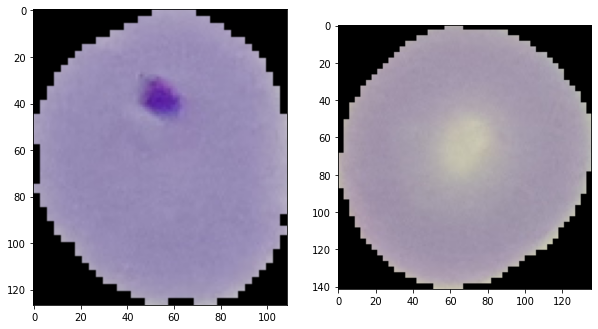

In [13]:
img_dir='/content/drive/MyDrive/malaria_dataset'

# example of image with infection
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(Image.open(img_dir + '/Parasitized/C189P150ThinF_IMG_20151203_142224_cell_91.png'))
ax[1].imshow(Image.open(img_dir + '/Uninfected/C241NThinF_IMG_20151207_124643_cell_169.png'))

**Data augmentation**

In [14]:
train_transforms = transforms.Compose([transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
                                       transforms.RandomRotation(degrees=15),
                                       transforms.ColorJitter(),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.CenterCrop(size=224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                       ])

test_transforms = transforms.Compose([transforms.Resize(256), 
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

validation_transforms = transforms.Compose([transforms.Resize(256), 
                                            transforms.CenterCrop(224),
                                            transforms.ToTensor(),
                                            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

**Division of the dataset into train, val and test**

In [15]:
train_data = datasets.ImageFolder(img_dir, transform=train_transforms)
num_workers = 0
valid_size = 0.2
test_size = 0.1

In [16]:
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)

In [17]:
valid_split = int(np.floor((valid_size) * num_train))
test_split = int(np.floor((valid_size+test_size) * num_train))
valid_idx, test_idx, train_idx = indices[:valid_split], indices[valid_split:test_split], indices[test_split:]
print(len(valid_idx), len(test_idx), len(train_idx))

5511 2756 19291


In [18]:
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
test_sampler = SubsetRandomSampler(test_idx)

In [19]:
# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=32, sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(train_data, batch_size=32, sampler=test_sampler, num_workers=num_workers)

**Load model**

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.densenet121(pretrained=True)
print(model)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

**Transformation of the model for our task**

In [21]:
# freezing model parameters
for param in model.parameters():
    param.require_grad = False

In [22]:
# create our own classifier to predict two classes ouput
fc = nn.Sequential(nn.Linear(1024, 460),
                   nn.ReLU(),
                   nn.Dropout(0.4),
                   nn.Linear(460, 2),
                   nn.LogSoftmax(dim=1))

In [23]:
# replace densenet121 classifier to our classifier
model.classifier = fc
criterion = nn.NLLLoss()

In [24]:
# define optimizer
optimizer = torch.optim.Adam(model.classifier.parameters(), lr=0.003)
model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

**Training of the model and saving the control points of the best parameters of the model**

In [25]:
epochs = 10
valid_loss_min = np.Inf

for epoch in range(epochs):
    start = time.time()
    model.train()

    train_loss = 0.0
    valid_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        logps = model(inputs)
        loss = criterion(logps, labels)
        loss.backward()

        optimizer.step()
    
    train_loss += loss.item()
    model.eval()

    with torch.no_grad():
        accuracy = 0
        
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            logps = model.forward(inputs)
            batch_loss = criterion(logps, labels)

    valid_loss += batch_loss.item()

    # calculate accuracy
    ps = torch.exp(logps)
    top_p, top_class = ps.topk(1, dim=1)
    equals = top_class == labels.view(*top_class.shape)
    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

    # calculate average losses
    train_loss = train_loss / len(train_loader)
    valid_loss = valid_loss / len(valid_loader)
    valid_accuracy = accuracy / len(valid_loader)

    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \tValidation Accuracy: {:.6f}'.format(epoch + 1, train_loss, valid_loss, valid_accuracy))

    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...'.format(valid_loss_min, valid_loss))
        model_save_name = "Malaria.pt"
        path = f"/content/drive/MyDrive/{model_save_name}"
        torch.save(model.state_dict(), path)
        valid_loss_min = valid_loss

    print(f"Time per epoch: {(time.time() - start):.3f} seconds")

Epoch: 1 	Training Loss: 0.000444 	Validation Loss: 0.000733 	Validation Accuracy: 0.005780
Validation loss decreased (inf --> 0.000733). Saving model ...
Time per epoch: 3129.207 seconds
Epoch: 2 	Training Loss: 0.000177 	Validation Loss: 0.000758 	Validation Accuracy: 0.005780
Time per epoch: 469.010 seconds
Epoch: 3 	Training Loss: 0.000736 	Validation Loss: 0.000888 	Validation Accuracy: 0.004955
Time per epoch: 468.215 seconds
Epoch: 4 	Training Loss: 0.000899 	Validation Loss: 0.001486 	Validation Accuracy: 0.004955
Time per epoch: 469.200 seconds
Epoch: 5 	Training Loss: 0.000295 	Validation Loss: 0.003703 	Validation Accuracy: 0.004955
Time per epoch: 470.974 seconds
Epoch: 6 	Training Loss: 0.000793 	Validation Loss: 0.000539 	Validation Accuracy: 0.005780
Validation loss decreased (0.000733 --> 0.000539). Saving model ...
Time per epoch: 470.993 seconds
Epoch: 7 	Training Loss: 0.000545 	Validation Loss: 0.000577 	Validation Accuracy: 0.005780
Time per epoch: 470.614 seconds


**Load a saved model from disk** 

In [26]:
model.load_state_dict(torch.load('/content/drive/MyDrive/Malaria.pt'));

**Test results**

In [27]:
def test(model, criterion):
    test_loss = 0.
    correct = 0.
    total = 0.

    for batch_idx, (data, target) in enumerate(test_loader):
        
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()

        output = model(data)
        loss = criterion(output, target)
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        pred = output.data.max(1, keepdim=True)[1]
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)

    print('Test Loss: {:.6f}\n'.format(test_loss))
    print('Test Accuracy: %2d%% (%2d/%2d)' % (100. * correct / total, correct, total)) 

In [28]:
test(model, criterion)

Test Loss: 0.209728

Test Accuracy: 92% (2539/2756)


**Visualization of results**

In [29]:
def load_input_image(img_path):
    image = Image.open(img_path)
    prediction_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                               transforms.ToTensor(),
                                               transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    image = prediction_transform(image)[:3,:,:].unsqueeze(0)
    return image

In [30]:
def predict_malaria(model, class_names, img_path):
    img = load_input_image(img_path)
    model = model.cpu()
    model.eval()
    idx = torch.argmax(model(img))
    return class_names[idx]

In [31]:
class_names=['Parasitized','Uninfected']
inf = np.array(glob(img_dir + "/Parasitized/*"))
uninf = np.array(glob(img_dir + "/Uninfected/*"))

Parasitized


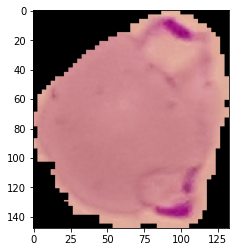

Parasitized


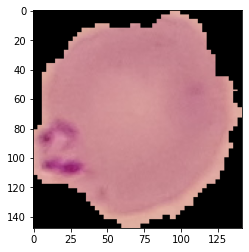

Parasitized


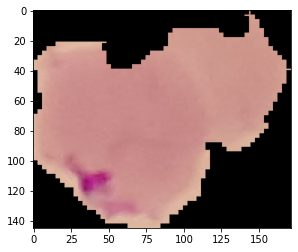

In [32]:
for i in range(3):
    img_path=inf[i]
    img = Image.open(img_path)

    if predict_malaria(model, class_names, img_path) == 'Parasitized':
        print(colored('Parasitized', 'green'))
    else:
        print(colored('Uninfected', 'red'))

    plt.imshow(img)
    plt.show()

Uninfected


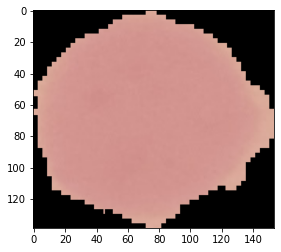

Uninfected


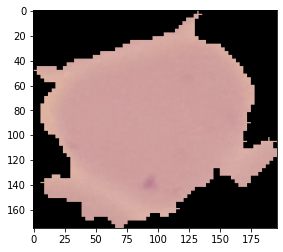

Uninfected


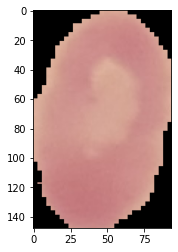

In [33]:
for i in range(3):
    img_path=uninf[i]
    img = Image.open(img_path)

    if predict_malaria(model, class_names, img_path) == 'Uninfected':
        print(colored('Uninfected', 'green'))
    else:
        print(colored('Parasitized', 'red'))
    
    plt.imshow(img)
    plt.show()

Task 6. Classification of pneumonia through image processing and machine learning. Data can be downloaded [here](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia).